In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd

from src.models.fetch_data_from_hdf5 import get_tf_data

In [2]:
f = h5py.File("/home/val/python_wkspce/plc_seg/data/processed/2d/test.hdf5", "r")

In [ ]:
f.close()

In [3]:
clinical_df = pd.read_excel("../data/List_lymphangite_radiomics_SNM2020_MJ.xlsx").set_index("patient_id")

In [ ]:
clinical_df.loc[10, "plc_status"]

In [ ]:
ds = get_tf_data(f, clinical_df, random_slice=True, random_shift=50)

In [ ]:
for image, (mask, plc_status) in ds.as_numpy_iterator():
    print(f" shape of the image {image.shape} and the mask {mask.shape}")

In [ ]:
image.shape

In [ ]:
mask.shape

In [ ]:
x = get_tf_data(f, random_slice=True, random_shift=50).as_numpy_iterator()

In [ ]:
image, mask = next(x)

In [ ]:
plt.imshow(image[:,:, 0],cmap='gray')
plt.imshow(mask[:,:, 1], cmap='jet', alpha=0.5)

In [12]:
image = f["PatientLC_21/image"]
mask = f["PatientLC_21/mask"]

In [13]:
image.shape

(512, 512, 71, 3)

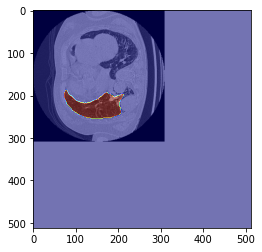

In [16]:
s= 30
plt.imshow(image[:,:,s, 0],cmap='gray')
plt.imshow(mask[:,:,s, 3], cmap='jet', alpha=0.5)

In [18]:

def get_bb_mask_voxel(mask):
    positions = np.where(mask != 0)
    x_min = np.min(positions[0])
    y_min = np.min(positions[1])
    z_min = np.min(positions[2])
    x_max = np.max(positions[0])
    y_max = np.max(positions[1])
    z_max = np.max(positions[2])
    return np.array([x_min, y_min, z_min, x_max, z_max, y_max])

In [19]:
get_bb_mask_voxel(mask[...,2] + mask[...,3])

array([ 43,  73,   0, 258,  70, 246])